1D Data Analysis, Histograms, Boxplots, and Violin Plots
===

## Unit 7, Lecture 2

*Numerical Methods and Statistics*

----

#### Prof. Andrew White,  2/27/2020

# Goals

1. Be able to histogram 1D data
2. Understand the difference between 1D and categorical 1D data
3. Know how to make violin plots

In [1]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi
import scipy
import scipy.stats

plt.style.use('seaborn-whitegrid')

In [2]:
!pip install --user pydataset

Getting Data from PyDatasets
===

One way to get data is using the `pydatasets` package. You can find the list of datasets [here](http://vincentarelbundock.github.io/Rdatasets/datasets.html) and you can use one like so:

In [3]:
import pydataset

data = pydataset.data('chickwts').values
data.shape

initiated datasets repo at: /home/whitead/.pydataset/


(71, 2)

We have loaded a dataset with 71 data points and each data point has 2 pieces of information. Let's see one

In [4]:
print(data[0, :])

[179 'horsebean']


The first slice index says grab row `0` and the second slice says grab all columns. Each data point contains the mass of a chicken and the type of food it was fed.

Analzying 1D Data
====

Let's see an example with data from Lake Huron. Our first tool to understand 1D numerical data is to look at sample mean and sample standard deviation. 

In [5]:
#load data
huron = pydataset.data('LakeHuron').values

#see the dimensions of the data
print(huron.shape)

#look at the first row
print(huron[0,:])

(98, 2)
[1875.    580.38]


This data has 98 rows and 2 columns. The columns contain the year and the depth of Lake Huron in feet. We cannot simply take the mean of all the data because that would be the mean of all years *and* depths. Instead, we can slice out only one of the columns

In [6]:
huron_mean = np.mean(huron[:, 1])
print(huron_mean)

579.0040816326531


We now will follow significant figures convention in our calculations. Each data point in the dataset has 5 digits of precision, so our mean should as well. Thus we will print like so:

In [7]:
huron_mean = np.mean(huron[:, 1])
print('The mean is {:.5} ft'.format(huron_mean))

The mean is 579.0 ft


We can similarily calculate the sample standard deviation:

In [8]:
huron_std = np.std(huron[:, 1], ddof=1)
print('The sample standard deviation is {:.5} ft'.format(huron_std))

The sample standard deviation is 1.3183 ft


We had to specify manually that we want to have the $N - 1$ term in the denominator. `numpy` uses a convention where you can specify what is subtracted from $N$ in the denominator through the `ddof` argument, which stands for deducted degrees of freedom. Thus `ddof = 1` means we want to have $N - 1$ in the denominator instead of the default $N$ in the denominator. 

Histogramming
====
Histogramming is the process of sorting data into bins and counting how much data is in each bin. Let's see a basic example.


In [9]:
#create some data
x = [1, 2, 13, 15, 11, 12]
#compute histogram
counts, bin_edges = np.histogram(x, bins=[0, 10, 20])
for i in range(len(counts)):
    print('There were {} samples between {} and {}'.format(counts[i], bin_edges[i], bin_edges[i + 1]))

There were 2 samples between 0 and 10
There were 4 samples between 10 and 20


We made two bins, one from 0 to 10 and another from 10 to 20. Those were specified with the `bins = [0, 10, 20]` command. We then were given the counts of data within those bins. We can plot using our output from `np.histogram`, or we can do both the histogram and plot using `plt.hist`.

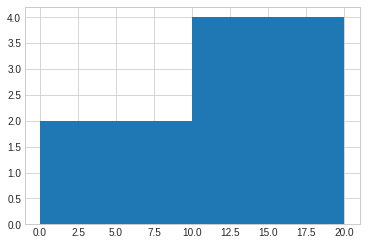

In [10]:
plt.hist(x, bins=[0, 10, 20])
plt.show()

There are a few problems we can see. The first is that the x-axis has ticks in weird locations. The second problem is that the bars are right on top of one another, so it's hard to tell what's going on. Let's adjust the options to fix this.

/home/whitead/miniconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


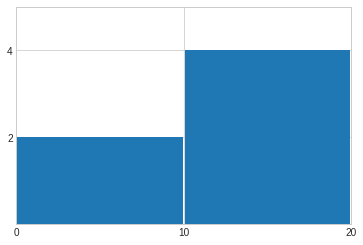

In [11]:
#rwidth controls how close bars are
plt.hist(x, bins=[0, 10, 20], rwidth = 0.99, normed=False)
#set exactly where the ticks should be
plt.xticks([0, 10, 20])
plt.yticks([2, 4])
plt.xlim(0, 20)
plt.ylim(0, 5)
plt.show()

Now let's take a look at the Lake Huron level. 

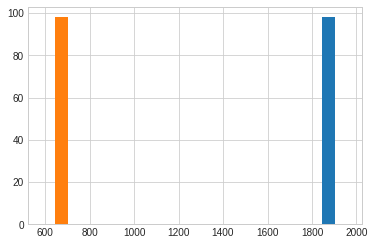

In [12]:
plt.hist(huron)
plt.show()

What went wrong?

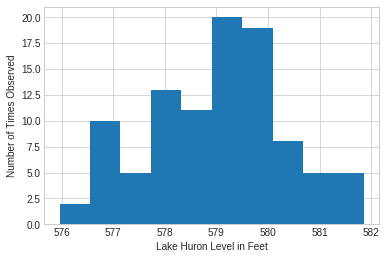

In [13]:
plt.hist(huron[:, 1])
plt.xlabel('Lake Huron Level in Feet')
plt.ylabel('Number of Times Observed')
plt.show()

The ticks aren't great and I personally don't like the bars touching. Let's work a little on improving the plot.

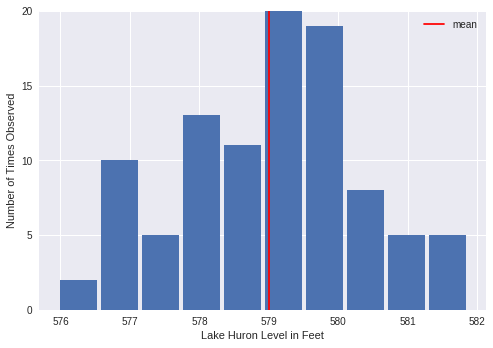

In [14]:
plt.style.use('seaborn')
plt.hist(huron[:, 1], rwidth=0.9)
plt.xlabel('Lake Huron Level in Feet')
plt.ylabel('Number of Times Observed')
plt.yticks([0, 5, 10, 15, 20])
plt.ylim(0,20)
plt.axvline(x=np.mean(huron[:,1]),color='red', label='mean')
plt.legend()
plt.show()

We can see a lot from this figure. We can see the lowest and highest depths. This representation may remind you of how probability distributions look and indeed, this representation is how you can reconstruct probability mass functions. To see this, let's look at another example.

We'll look at a larger dataset that is speed of cars.

In [15]:
car_speed = pydataset.data('amis').values
speeds = car_speed[:, 0]
print(len(speeds))

8437


/home/whitead/miniconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


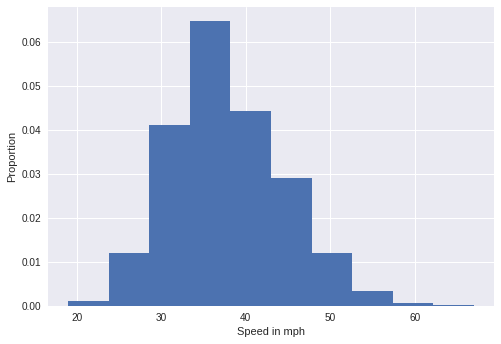

In [16]:
#now we'll use normed
plt.hist(speeds, normed=True)
plt.xlabel('Speed in mph')
plt.ylabel('Proportion')
plt.show()

Now the y-axis shows the proportion of times that a particular speed was observed. Thanks to the Law of Large Numbers, and the fact we have 8,500 samples, we know that these proportions will approach the probabilities of these intervals. For example, the probability of observing a speed between 25 and 30 mph is $\approx 0.012$. If we make our bins small enough, we'll eventually be able to assign a probability to any value and thus we'll have recreated the probability mass function!

Kernel Density Estimation
====

Kernel density estimation is a more sophisticated method for estimating the probability mass function from a histogram. It can help you see what *type* of distribution your data might follow (e.g., normal, exponential). Let's see an example.

/home/whitead/miniconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


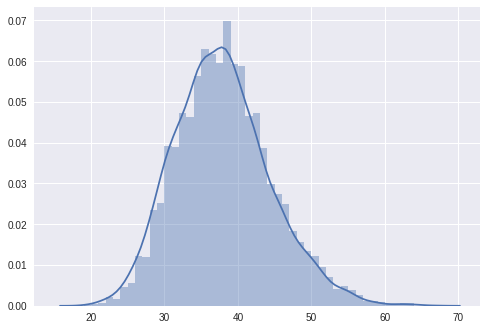

In [17]:
import seaborn as sns

sns.distplot(speeds, bins=range(15, 65))
plt.show()

The new solid line shows us that a normal distribution would be a good fit, although the right tail is a little long. This line is generated by estimating what the histogram would look like if the bins were infinitely small.

Categorical Data Boxplots
====

Sometimes we'll have measured some quantity, like mass of a chicken, under multiple conditions. This is not exactly 2D, because the conditions are usually categorical data. For example, my conditions are the kind of food I've fed to my chickens. We can analyze this using a boxplot, which shows the category and quartiles in one plot.

In [18]:
data = pydataset.data('chickwts').values
categories = np.unique(data[:,1])
print(categories)

['casein' 'horsebean' 'linseed' 'meatmeal' 'soybean' 'sunflower']


This first step is a way to find all the unique labels to find our possible categories. Now we'll use that to separate our data into a list of arrays, one for each catgory, instead of one large array.

In [19]:
data_as_arrays = []
#loop over categories
for c in categories:
    #get a True/False array showing which rows had which category
    rows_with_category = data[:,1] == c
    #now slice out the rows with the category and grab column 0 (the chicken mass)
    data_slice = data[rows_with_category, 0]
    #now we need to make the data into floats, because it happened to be loaded as a string
    data_as_arrays.append(data_slice.astype(float))

Whew! That was a lot of work. We used a few tricks. One was that you can slice using True and False values in numpy. Let's see a smaller example:

In [20]:
x = np.array([4, 10, 20])
my_slice = [True, False, True]
x[my_slice]

array([ 4, 20])

The other thing we did is convert the array into floating point numbers. Recall that in `numpy` each array can only be one data type. The original chicken dataset had strings in it, like 'linseed', so that the whole array was strings. We thus had to convert to floats to do calculations on the chicken weights. We used the `astype()` method on the array. 

So we found which rows had their second column (the category column) be equal to category `c` and then slice out those rows. Now we can make the boxplot.

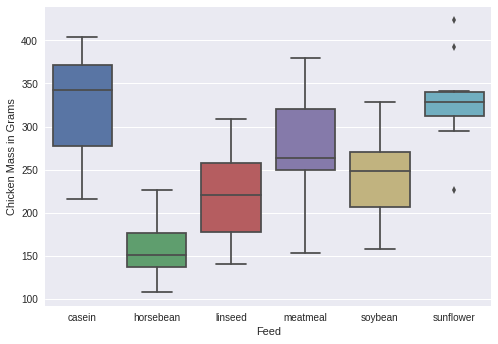

In [21]:
#NOTICE WE USE Seaborn not PLT
sns.boxplot(data=data_as_arrays)
#Need to replace the ticks (0, through N - 1) with the names of categories
plt.xticks(range(len(categories)), categories)
plt.xlabel('Feed')
plt.ylabel('Chicken Mass in Grams')
plt.show()

The box plot shows a quite a bit of information. It should the median in as a horizontal line over the box. The box itself shows the middle two quartiles and the "whiskers" show the bottom 10th and upper 90th percentiles of the data. The points outside of the boxs are outliers. 

Violin Plots
====

Just like how we saw that you can use kernel density estimation to provide richer information, we can apply this to boxplots as well.

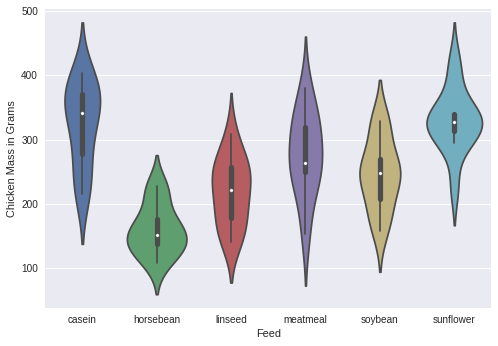

In [22]:
sns.violinplot(data=data_as_arrays)
#Need to replace the ticks (0, through N - 1) with the names of categories
plt.xticks(range(len(categories)), categories)
plt.xlabel('Feed')
plt.ylabel('Chicken Mass in Grams')
plt.show()

In this plot, you can see the original boxes inside the "violins". The violins show the same thing we saw above with Kernel Density Estimation and shows how spread the data is.